# QB Performance Under Fourth-Quarter Pressure (2025)

In [185]:
#Imports
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
#Fetching Data
season_year = 2025
data = nfl.import_pbp_data([season_year])

2025 done.
Downcasting floats.


In [197]:
#Cleaning Data
data_no_null = data.dropna(subset=['down','passer', 'epa', 'ydstogo','score_differential'])
stats = data_no_null[
    data_no_null['play_type'] == 'pass'
][['epa', 'down', 'ydstogo', 'qtr', 'passer', 'score_differential']]

## Methodology
- Baseline: All pass plays in quarters 1–3
- Pressure situations:
  - 4th quarter
  - Score within 7 points
  - 3rd & 7+ or any 4th down
- Metric: EPA per play
- Minimum threshold: 400 completions

In [198]:
#Filtering Data
#Ensures every qb in data has thrown atleast 400 passes
qb_attempts = (
    stats
    .groupby('passer')
    .size()
    .reset_index(name='attempts')
)

valid_qbs = qb_attempts[qb_attempts['attempts'] >= 400]['passer']
stats = stats[stats['passer'].isin(valid_qbs)]

In [199]:
#Fetching EPA For All Valid Quarterbacks
qb_epa_regular=(
    stats
    .groupby('passer')['epa']
    .mean()
    .sort_values(ascending=False)
)

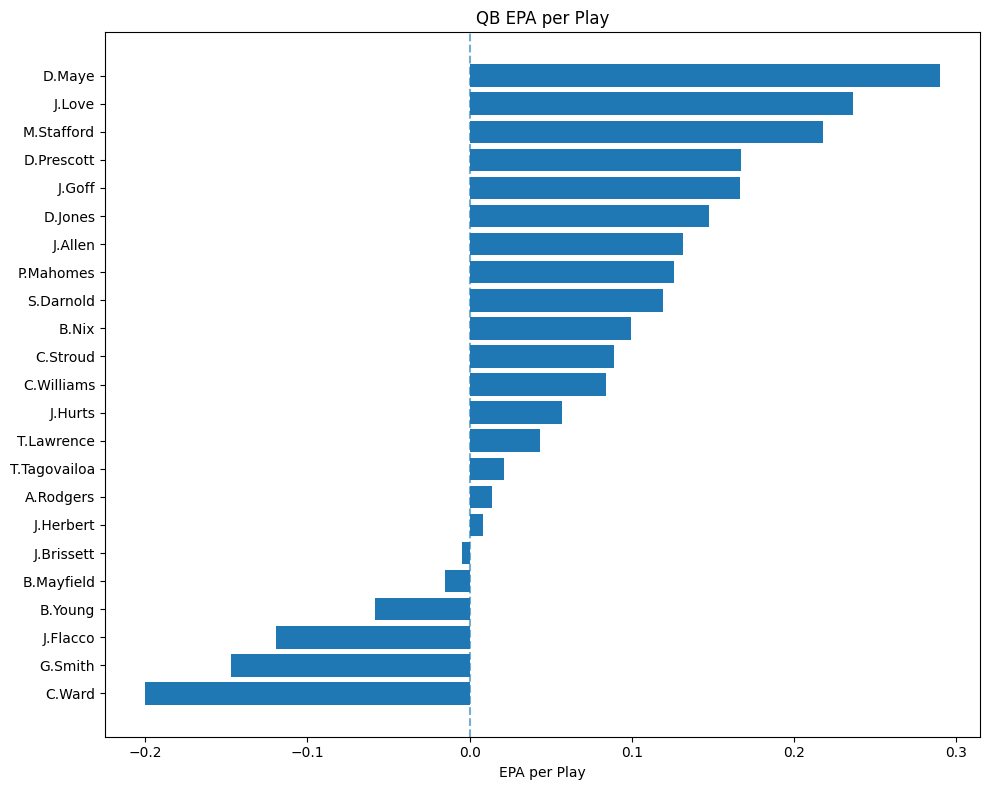

In [200]:
#Plotting EPA In Bar Chat
plt.figure(figsize=(10, 8))
plt.barh(qb_epa_regular.index, qb_epa_regular.values)
plt.xlabel('EPA per Play')
plt.title('QB EPA per Play')
# Put best QBs at the top
plt.gca().invert_yaxis()
# Optional: vertical reference line at EPA = 0
plt.axvline(0, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [201]:
#EPA For All Pass Plays in Quarters 1-3
epa_quarters_one_through_three = stats[
    (stats['qtr']!=4.0)
]

qb_epa_one_through_three= (
    epa_quarters_one_through_three 
    .groupby('passer')['epa']
    .mean()
    .sort_values(ascending=False)
)

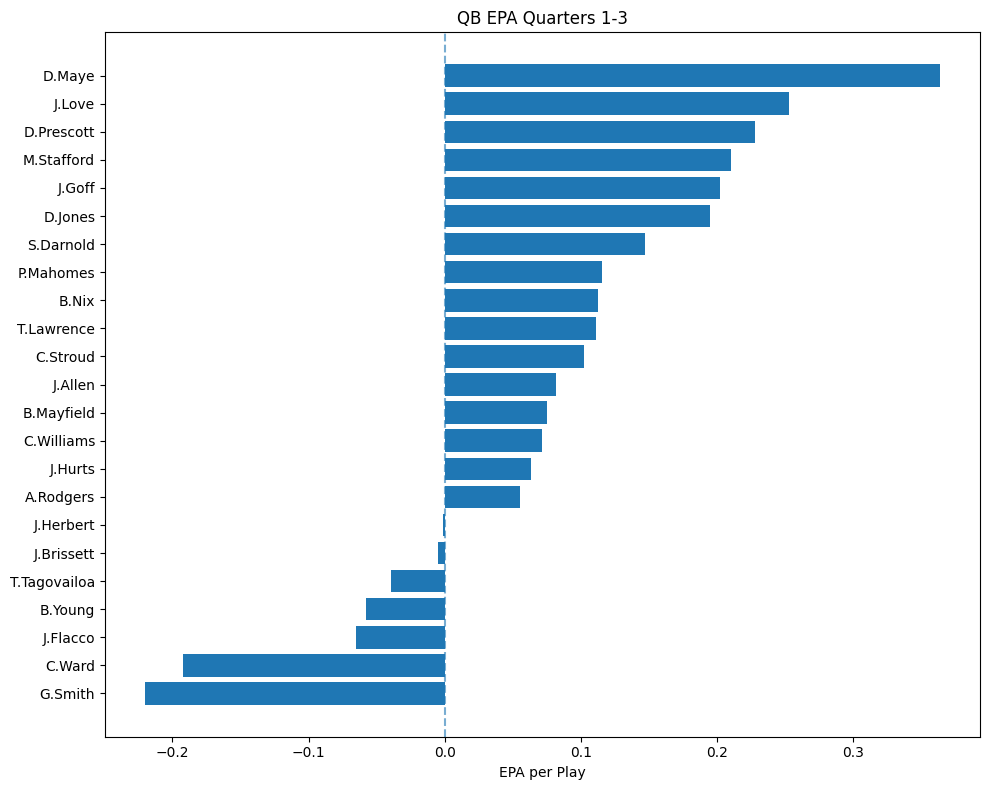

In [202]:
#Print Bar Chart Of EPA In Quarters 1-3
plt.figure(figsize=(10, 8))
plt.barh(qb_epa_one_through_three.index, qb_epa_one_through_three.values)
plt.xlabel('EPA per Play')
plt.title('QB EPA Quarters 1-3')
plt.gca().invert_yaxis()
plt.axvline(0, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [203]:
#Filtering to high pressure situations
pressure_situations_in_fourth = stats[
    (stats['score_differential'].abs() <= 7) & 
    ((stats['down']==3.0) & (stats['ydstogo']>=7.0)| (stats['down']==4.0)) &
    (stats['qtr']==4.0)
]

#EPA for each quarterback in such situations
qb_epa_pressure_4th= (
    pressure_situations_in_fourth
    .groupby('passer')['epa']
    .mean()
    .sort_values(ascending=False)
)

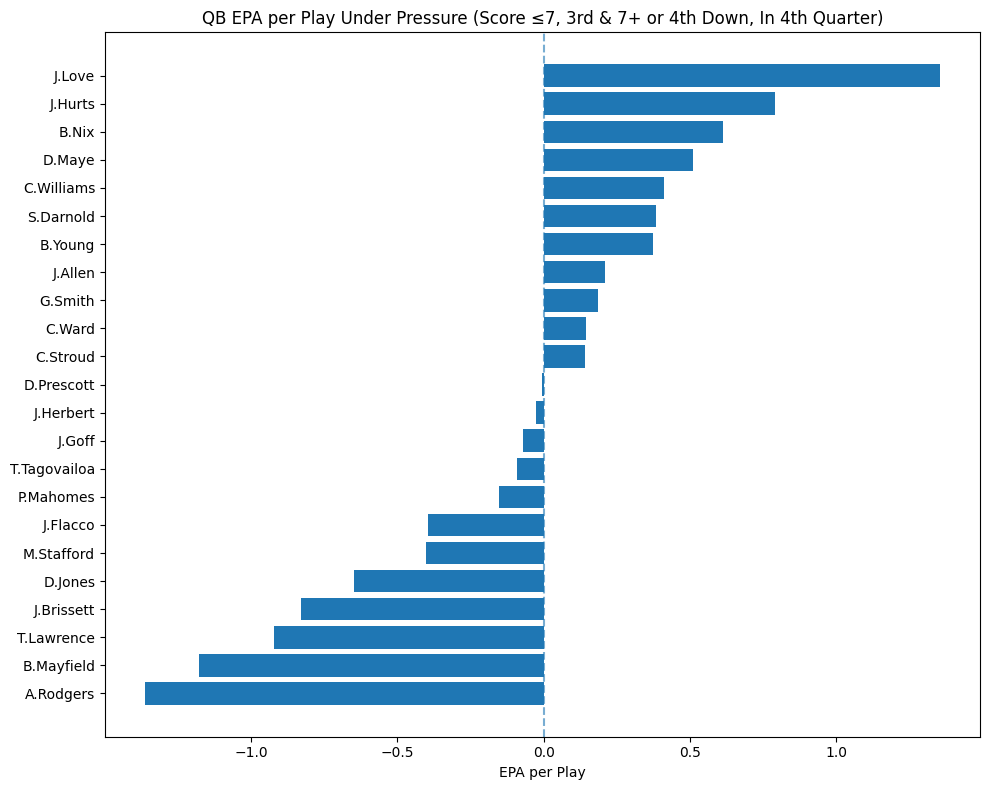

In [204]:
#Plotting
plt.figure(figsize=(10, 8))
plt.barh(qb_epa_pressure_4th.index, qb_epa_pressure_4th.values)
plt.xlabel('EPA per Play')
plt.title('QB EPA per Play Under Pressure (Score ≤7, 3rd & 7+ or 4th Down, In 4th Quarter)')
plt.gca().invert_yaxis()
plt.axvline(0, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



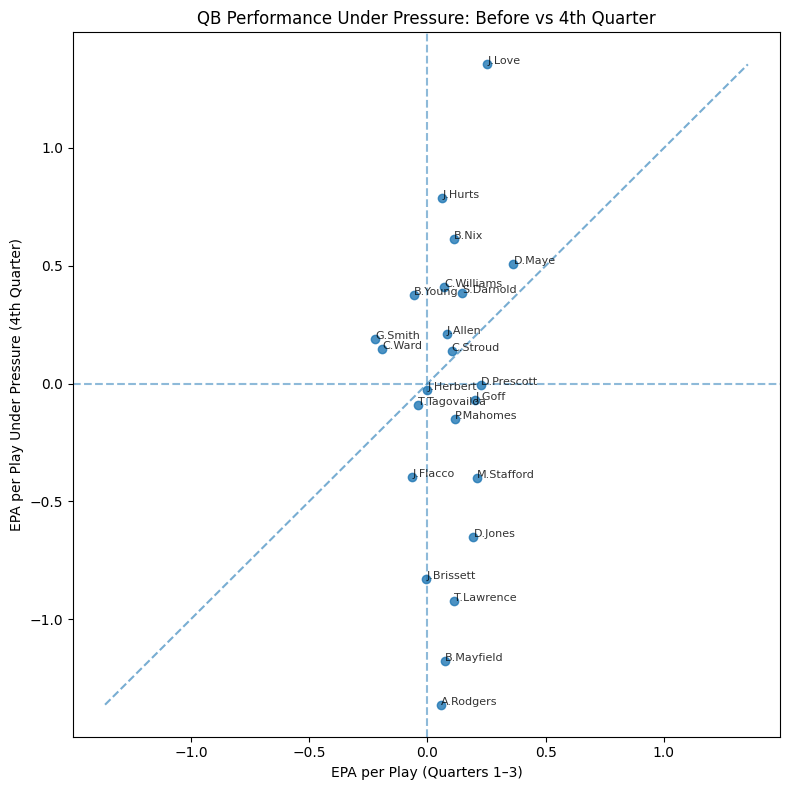

In [205]:
#Comparison Table for fourth quarter and non fourth quarter results
comparison = (
    qb_epa_one_through_three
    .rename('epa_1_3')
    .to_frame()
    .join(qb_epa_pressure_4th.rename('epa_4_pressure'))
)

comparison['change_epa']=(
    comparison['epa_4_pressure'] - comparison['epa_1_3']
)
comparison = comparison.sort_values('change_epa', ascending=False)

#Plotting
plt.figure(figsize=(8, 8))
plt.scatter(
    comparison['epa_1_3'],
    comparison['epa_4_pressure'],
    alpha=0.8
)

plt.axhline(0, linestyle='--', alpha=0.5)
plt.axvline(0, linestyle='--', alpha=0.5)

min_val = min(comparison[['epa_1_3', 'epa_4_pressure']].min())
max_val = max(comparison[['epa_1_3', 'epa_4_pressure']].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', alpha=0.6)

plt.xlabel('EPA per Play (Quarters 1–3)')
plt.ylabel('EPA per Play Under Pressure (4th Quarter)')
plt.title('QB Performance Under Pressure: Before vs 4th Quarter')

for qb in comparison.index:
    plt.text(
        comparison.loc[qb, 'epa_1_3'],
        comparison.loc[qb, 'epa_4_pressure'],
        qb,
        fontsize=8,
        alpha=0.8
    )

plt.tight_layout()
plt.show()

### Key Takeaways

- Most quarterbacks possessed a 0-0.5 range in EPA
- Half those quarterbacks had low EPA in fourth quarter situations
- Baker Mayfield's EPA suggests he has struggled in the fourth quarter
- Drake Maye has put his team in good position consistently
- Jalen Hurts and Bo Nix save their best football for the fourth quarter
- Could this be a reason to pick Drake Maye over Matthew Stafford for MVP?

### Limitations

Context of game not fully captured
- While this analysis pressure using score differential, down and distance, and quarter, it doesn't account for broader game context. 
- Examples include playoff implcations, two minute drill, timeouts remaining...

Did not consider roster strength around QB
- Quarterback performance is also affected by factors beyond their control.
- Those factors include, offensive line performance, recievers seperation, and play-calling.
- The numbers here do not account for roster quality surrounding the thrower.

Pressure definition is subjective
- The definition of pressure is based on down, distance, score differential, and quarter. However, alternative definitons such as two minute drill might lead to different results

### Future Work
- Future analysis could incorprate variables such as time remaining, team quailty, opponent quality, and accumulate numbers over multiple seasons.

### Conclusion
- Using the 2025 play by play data, the analysis above captures quarterback performance in pressure situations late in games compared to earlier in the game.
- The results show variation amongst quarterbacks where some show an improvment in the clutch while others have a decline.
- It should be noted that the metric of EPA is not a concrete measure of how quarterbacks perform and should rather be looked at as framework to evaluate situational tendencies.

### Reusability
- This notebook is designed to be useful among different seasons
- Users can analyze quarterbacks in different seasons by modifying the 'season_year' variable at the top of the notebook.
- Note that it is sufficient for any season starting at 1999